In [2]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Question 1 (Intensity transformation)

#

In [3]:
# creating transformation points
pts = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, pts[0, 1], pts[0, 0] + 1 - 0).astype(np.uint8)
t2 = np.linspace(pts[0, 1] + 1, pts[1, 1], pts[1, 0] - pts[0, 0]).astype(np.uint8)
t3 = np.linspace(pts[1, 1] + 1, pts[2, 1], pts[2, 0] - pts[1, 0]).astype(np.uint8)
t4 = np.linspace(pts[2, 1] + 1, pts[3, 1], pts[3, 0] - pts[2, 0]).astype(np.uint8)
t5 = np.linspace(pts[3, 1] + 1, 255, 255 - pts[3, 0]).astype(np.uint8)

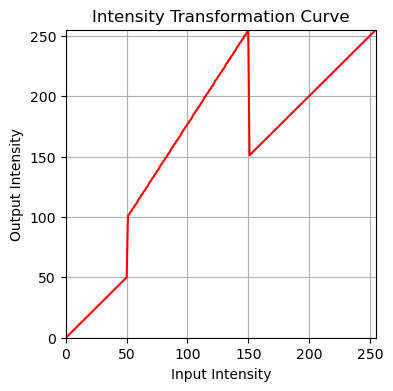

In [4]:
# Creating transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(x, transform, color='red')
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()

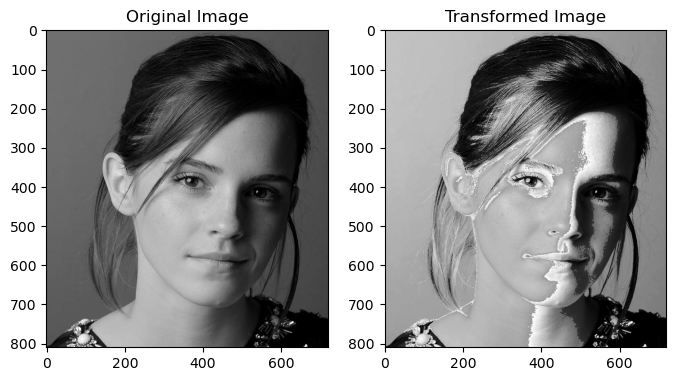

In [5]:
# Transform the image
img_1 = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

img_transformed = cv2.LUT(img_1, transform)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
plt.show()

## Question 2

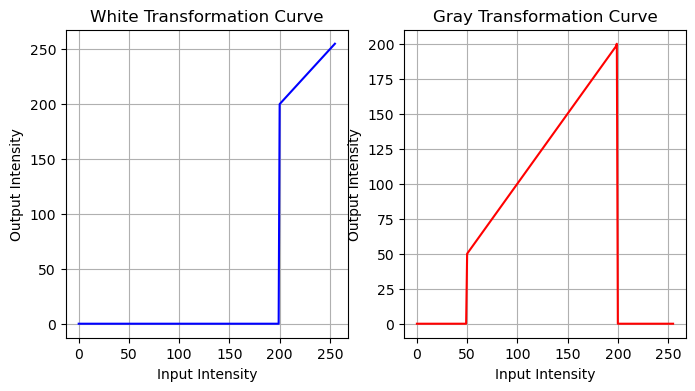

In [29]:
# Creating transformations

white_t = np.linspace(200, 255, 56).astype(np.uint8)
white_t = np.concatenate((np.zeros(200, dtype=np.uint8), white_t), axis=0).astype(np.uint8)

gray_t = np.linspace(50, 200, 150).astype(np.uint8)
gray_t = np.concatenate((np.zeros(50, dtype=np.uint8),gray_t, np.zeros(56, dtype=np.uint8)), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting white and grey transformations curves
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, white_t, color='blue')
ax[0].set_title("White Transformation Curve")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[0].grid(True)

ax[1].plot(x, gray_t, color='red')
ax[1].set_title("Gray Transformation Curve")
ax[1].set_xlabel("Input Intensity")
ax[1].set_ylabel("Output Intensity")
ax[1].grid(True)

plt.show()


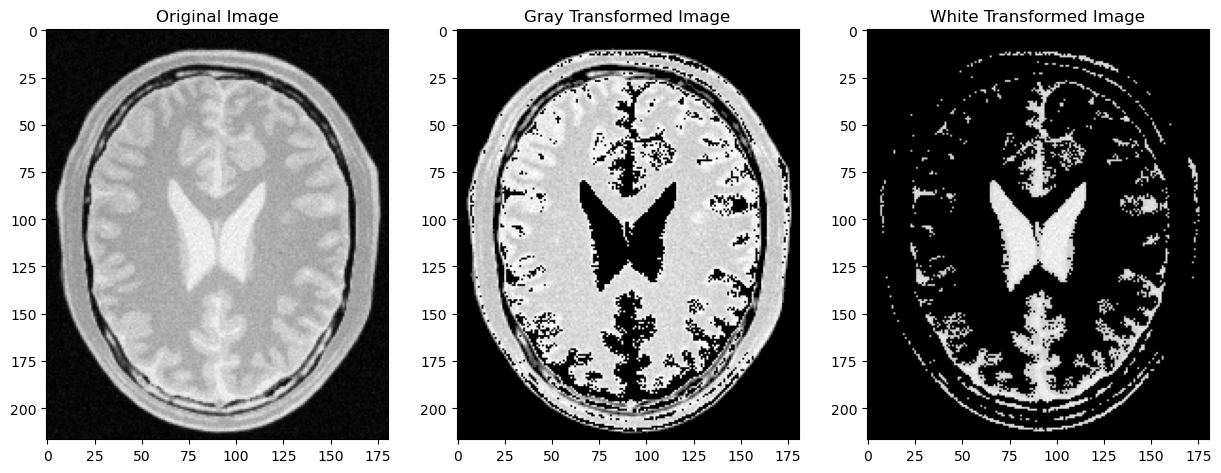

In [30]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

gray_transformed = cv2.LUT(img2, gray_t)
white_transformed = cv2.LUT(img2, white_t)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gray_transformed, cmap='gray')
ax[1].set_title('Gray Transformed Image')
ax[2].imshow(white_transformed, cmap='gray')
ax[2].set_title('White Transformed Image')
plt.show()

## Question 03

In [32]:
# Gamma correction in L - channel

gamma = 0.7
img3 = cv2.imread("a1images/highlights_and_shadows.jpg", cv2.IMREAD_COLOR)

L, a, b = cv2.split(cv2.cvtColor(img3, cv2.COLOR_BGR2LAB))

gamma_t = np.array([(j / 255.0)**gamma * 255 for j in range(256)]).astype(np.uint8)
L_corrected = cv2.LUT(L, gamma_t)

merged = cv2.merge((L_corrected, a, b))
img3_modified = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

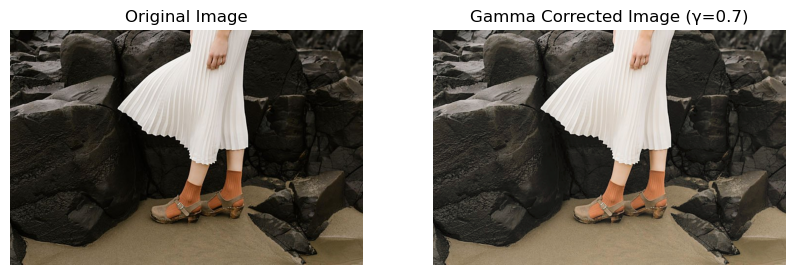

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(img3_modified, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Gamma Corrected Image (γ={gamma})")
ax[1].axis("off")

plt.show()

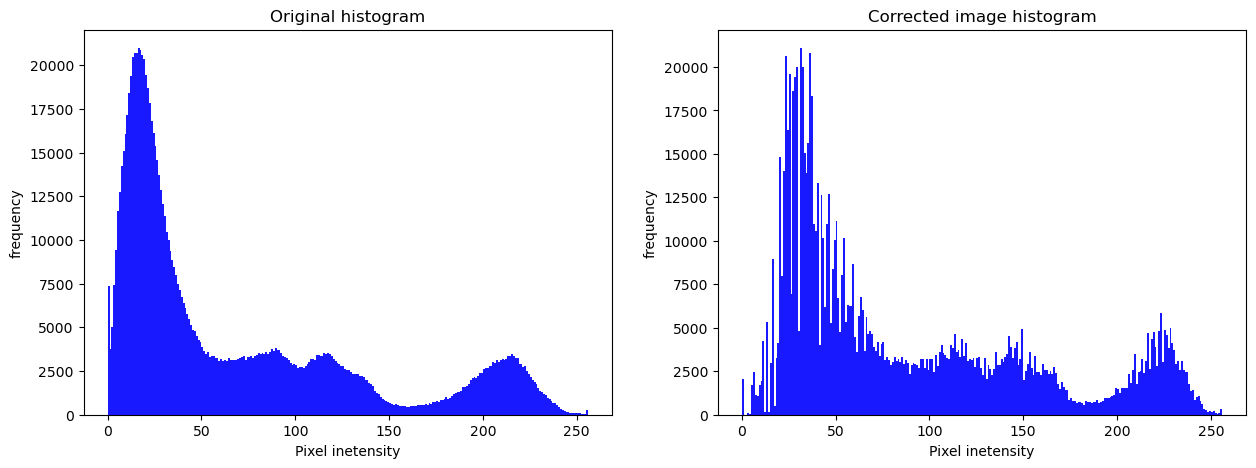

In [34]:
# Plotting histograms

img3_pixval = img3.ravel()
img3_modified_pixval = img3_modified.ravel()

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].hist(img3_pixval, bins=256, range=(0, 256), alpha=0.9, color='blue')
ax[0].set_title("Original histogram")
ax[0].set_xlabel('Pixel inetensity')
ax[0].set_ylabel('frequency')

ax[1].hist(img3_modified_pixval, bins=256, range=(0, 256), alpha=0.9, color='blue')
ax[1].set_title("Corrected image histogram")
ax[1].set_xlabel('Pixel inetensity')
ax[1].set_ylabel('frequency')

plt.show()

## Question 4

In [44]:
# Vibrance Transformation function
a = 0.5
gamma = 70
vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

    

### part (a)

In [45]:
img4 = cv2.imread("a1images/spider.png", cv2.IMREAD_COLOR)

h, s, v = cv2.split(cv2.cvtColor(img4, cv2.COLOR_BGR2HSV))

In [46]:
hue_trans = cv2.LUT(h, vib_t)

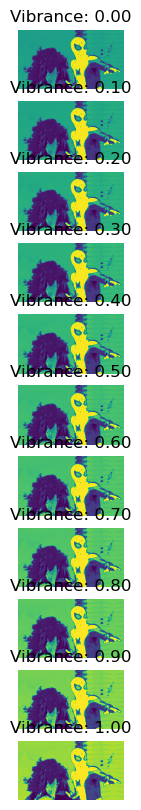

In [ ]:
sigma = 70

a_values = np.linspace(0, 1, 11)
fig, ax = plt.subplots(len(a_values), 1, figsize=(5, 10))

for i, a in enumerate(a_values):
    vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)
    hue_trans = cv2.LUT(h, vib_t)
    ax[i].imshow(hue_trans)
    ax[i].set_title(f'Vibrance: {a:.2f}')
    ax[i].axis('off')
plt.show()